**Name:** Omitted 

**Studednt ID:** Omitted

In [1]:
### Importing necessary libraries

## As usual libraries-

import numpy as np
import pandas as pd


## Data visualization libraries-

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Regression modelling libraries-

from sklearn import linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import statsmodels.api as sm


from sklearn import preprocessing   ## For Preporcessing


## Clusetering libraries-

from sklearn.cluster import KMeans

### Answer to the Question No: 01

#### (sn_game.csv)

**1. (15 points) In this exercise, you will perform tasks faced by a data scientist working for a game developer company. The company develops games for social networking platforms. Your job is to make sense of a dataset describing users from different perspectives.**

In [2]:
## Reading the given 'sn_game.csv' file

df_1 = pd.read_csv('sn_game.csv', sep = ',', header = 0)
df_1.tail(3)

,gender,age,edu,salary,sn.conn,sn.min,game.min,game.purchase
297,Male,24,University,3520,25,144.52,15.90,6
298,Female,33,University,3643,30,132.43,31.78,27
299,Male,23,High School,3607,21,129.20,36.18,36


**• Exploratory data analysis: try to understand the different variables in the data. Identify the variables, based on exploratory data analysis methods, that you think have an effect on the money spent in the game.**

In [3]:
### Understanding the data

df_1.info()

## Following we can have a look from multi dimentional agnle to the dataset, 
# such as- numbers of data entries, null values (if any), datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         300 non-null    object 
 1   age            300 non-null    int64  
 2   edu            300 non-null    object 
 3   salary         300 non-null    int64  
 4   sn.conn        300 non-null    int64  
 5   sn.min         300 non-null    float64
 6   game.min       300 non-null    float64
 7   game.purchase  300 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 18.9+ KB


In [4]:
### Data Cleaning
## Removing duplicate rows (if any) from the dataset

df_1_dup = df_1.drop_duplicates(keep = 'first')
df_1_dup.shape

(300, 8)

In [5]:
## Removing outliers: top 5% of values (0.95 quantile)
## Funcion for removing outliers-

def goons(x):   
    
    for col in x.columns:
        
 ## This checks whether the string 'float' is the sub-string of x[col].dtype as a string, same with 'int'.

        if (('float' in str(x[col].dtype)) | ('int' in str(x[col].dtype))): 
            
            outliers = x[col].quantile(0.95)
            x = x[x[col] < outliers]
            
        else:
            x[col] = x[col]
            
    return x

df_sn = goons(df_1_dup)
df_sn.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


(209, 8)

In [6]:
## Dropping non-effective variables

df_sn = df_sn.drop(['edu'], axis = 1)  
df_sn.sample(3)

,gender,age,salary,sn.conn,sn.min,game.min,game.purchase
58,Female,32,4154,31,202.85,40.57,33
129,Female,23,1376,22,134.24,21.48,4
101,Male,31,3001,30,180.32,41.47,28


In [7]:
## Checking the numbers of males and females in the dataset

df_sn['gender'].value_counts()

Female    108
Male      101
Name: gender, dtype: int64

In [8]:
## Some descriptive statistics

df_sn.describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
age,209.0,24.679426,3.987674,20.00,21.00,24.00,28.00,35.00
salary,209.0,2813.976077,1045.832993,1012.00,1828.00,2949.00,3695.00,4782.00
sn.conn,209.0,24.066986,3.871160,18.00,21.00,23.00,26.00,33.00
sn.min,209.0,142.344545,27.146609,78.89,123.12,141.63,161.95,211.73
game.min,209.0,25.303732,8.680736,8.09,17.09,24.24,31.82,49.45
game.purchase,209.0,12.755981,8.665958,1.00,6.00,11.00,18.00,36.00


In [9]:
df_sn.nunique()  ## Checking unique values

gender             2
age               16
salary           204
sn.conn           16
sn.min           208
game.min         202
game.purchase     35
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D5C761CC8>,
      dtype=object)

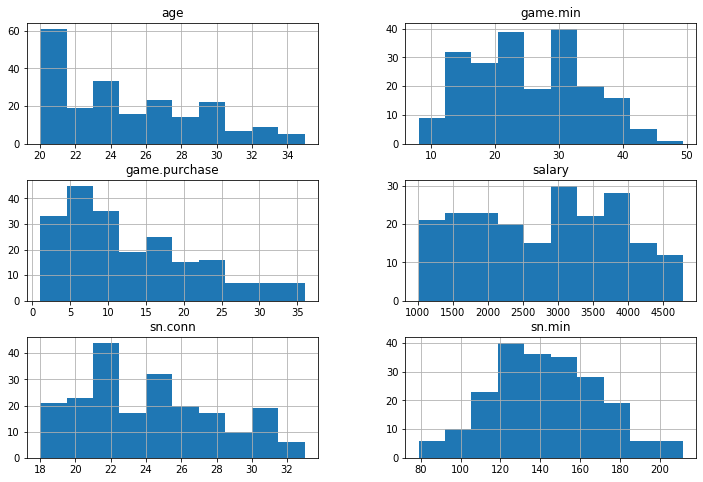

In [10]:
### Now we will see some vizualized form of data analysis

sn_num = df_sn.select_dtypes('number')
sn_num.hist(figsize=(12, 8))

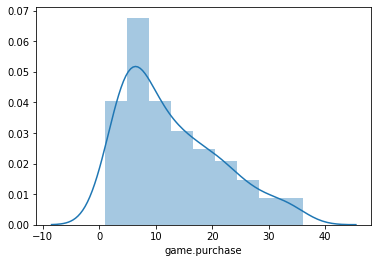

In [11]:
sns.distplot(df_sn['game.purchase'])

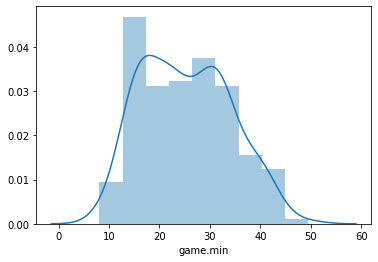

In [12]:
sns.distplot(df_sn['game.min'])

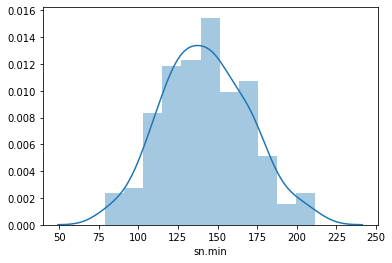

In [13]:
sns.distplot(df_sn['sn.min'])

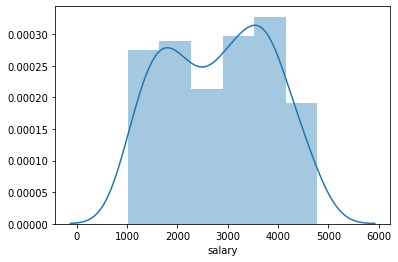

In [14]:
sns.distplot(df_sn['salary'])

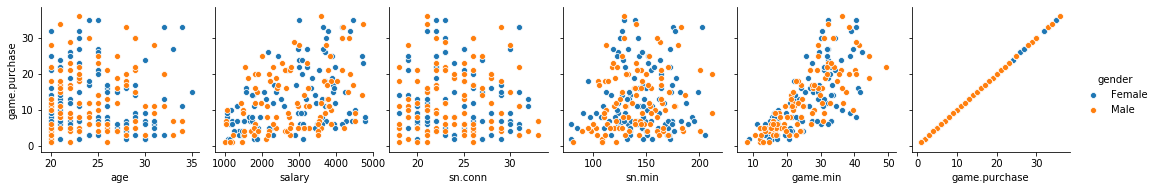

In [15]:
### Relationship analysis.

## Plotting relationship of 'game.purchase' column with the other numerical columns using pariplot-

## Here, in the x_var, 'sn_num' is used to have only numerical variables (exlcuded 'gender' from the plot). 
# (If we use only 'sn_num' for the whole loop, then we can't use the 'hue' argument.

for col in range(0, len(df_sn.columns), 8):
    sns.pairplot(df_sn, y_vars = ['game.purchase'], x_vars = sn_num.columns, hue = 'gender')

                    age    salary   sn.conn    sn.min  game.min  game.purchase
age            1.000000 -0.108125  0.936655  0.512966  0.176322      -0.008257
salary        -0.108125  1.000000 -0.118393 -0.082433 -0.173554       0.411071
sn.conn        0.936655 -0.118393  1.000000  0.567600  0.220653       0.000633
sn.min         0.512966 -0.082433  0.567600  1.000000  0.464849       0.137942
game.min       0.176322 -0.173554  0.220653  0.464849  1.000000       0.739180
game.purchase -0.008257  0.411071  0.000633  0.137942  0.739180       1.000000


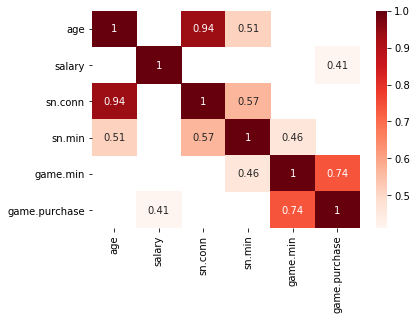

In [16]:
## Correaltion matrix

corr = df_sn.corr()

print(corr)

## As our target varaible is 'game.purchase', we will consider its correlation with other variables.

sns.heatmap(corr[(corr <= -0.4) | (corr >= 0.4)], annot = True, cmap = 'Reds')

## We assume that, Correlation Coefficient values greater than (- 0.4) or less than (+ 0.4) are not that significant.
## Therefore, from now on we shall more focus on the significant variables- 'salary' and 'game.min' in relation to 
# our target variable 'game.purchase'

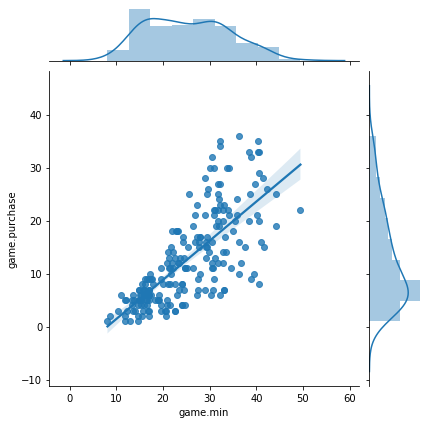

In [17]:
sns.jointplot('game.min', 'game.purchase', data = df_sn, kind = 'reg')

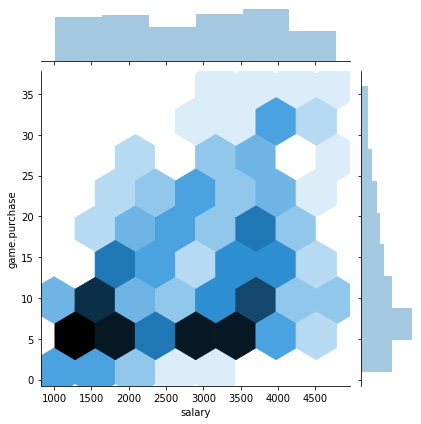

In [18]:
sns.jointplot('salary', 'game.purchase', data = df_sn, kind = 'hex')

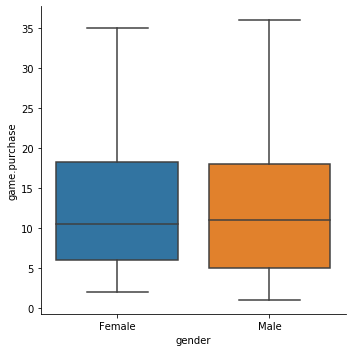

In [19]:
### We will alos chec our categorical column- 'gender' if it somehow affects the target variable- 'game.purchase'

sns.catplot(x = 'gender', y = 'game.purchase', kind = 'box', data = df_sn)

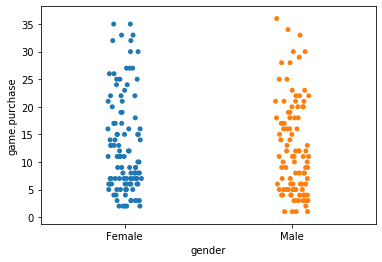

In [20]:
sns.stripplot(x = 'gender', y = 'game.purchase', data = df_sn, jitter = True, dodge = True)

**Comments:-** We can see that, 'gender' does not affect our target variable 'game.purchase'that much.Therefore, for our regression modelling we will go with 'salary' and 'game.min' variables

**• Develop a regression model that the company can use to predict a new users’ future spending in the game. The model should contain only the variables that were found as potentially important in the previous step.**

In [21]:
### Regression modeling

## Separate predictors and target variable 

sn_x, sn_y = df_sn[['salary', 'game.min']], df_sn['game.purchase']

## Data Split: Deviding the data into training (80 %) and test set (20 %) using 'random_state = 0' method

sn_x_train, sn_x_test, sn_y_train, sn_y_test = train_test_split(sn_x, sn_y, test_size = 0.2, random_state = 0)

In [22]:
## Checking the shape of splitted items

print(sn_x.shape, sn_y.shape)
print(sn_x_train.shape, sn_x_test.shape)
print(sn_y_train.shape, sn_y_test.shape)

(209, 2) (209,)
(167, 2) (42, 2)
(167,) (42,)


In [23]:
### Building Linear Model-

## Defining the regression model

sn_model = linear_model.LinearRegression()

In [24]:
## Now we will train the model using 'fit' method on the training set 

sn_model.fit(sn_x_train, sn_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
### Applying the model (Prediction)

## Once we trained our model, now we can make predictions for test set

sn_y_pred = sn_model.predict(sn_x_test)

In [26]:
### Now we will see what the result looks like compared to the original

print(sn_y_test[:5])
                      ## Here,'sn_y_test' is the actual value and 'sn_y_pred' is the perdicted value.
    
print(pd.Series(sn_y_pred[:5]).astype('int')) ## To get the values in integar format, as by defalut it is an np array.

13      9
115    14
43     22
5       4
267     9
Name: game.purchase, dtype: int64
0    14
1    14
2    23
3    -1
4    14
dtype: int32


In [27]:
### Model evaluation

## Results for the Training and Test sets 

print('Training set:', sn_model.score(sn_x_train, sn_y_train))
print('Test set:', sn_model.score(sn_x_test, sn_y_test))

Training set: 0.8500065698981918
Test set: 0.8059088224511004


In [28]:
### Scores with Cross validation

sn_scores = cross_val_score(sn_model, sn_x, sn_y, cv = 10)
sn_scores.mean()   ## Our model performance should be as close as to this Cross Validated Score Mean.

0.7935085782772362

In [29]:
## The intercept and slope

print('Intercept:', sn_model.intercept_)
print('Slope or Coef:', sn_model.coef_)

Intercept: -22.34975653790282
Slope or Coef: [0.00495228 0.83839428]


In [30]:
## The mean square error

print('mse:', mean_squared_error(sn_y_test, sn_y_pred))   
                                            
## And the coefficient of determination (We know that '1' is perfect prediction)

print('coef of determination:', r2_score(sn_y_test, sn_y_pred))

mse: 8.919501875284325
coef of determination: 0.8059088224511004


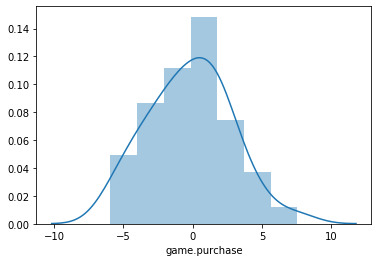

In [31]:
## Creating the residual plot

sn_residuals = sn_y_test - sn_y_pred

sns.distplot(sn_residuals)

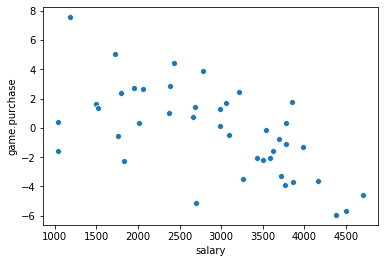

In [32]:
sns.scatterplot(df_sn['salary'], sn_residuals)

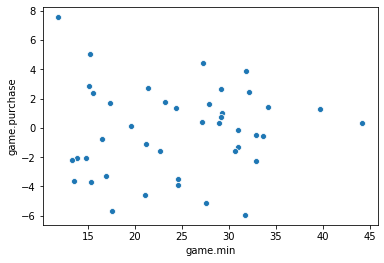

In [33]:
sns.scatterplot(df_sn['game.min'], sn_residuals)

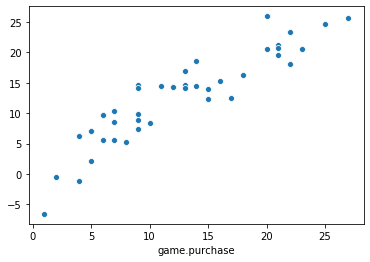

In [34]:
sns.scatterplot(sn_y_test, sn_y_pred)

In [35]:
### Alternatively, we can also use statsmodels library to build the same model (it helps get the results of statistical tests)

sn_st_model = sm.add_constant(sn_x_train)   ## Creating a Training Object using the training set

sn_est = sm.OLS(sn_y_train, sn_st_model)  ## To train to get the output type 'sn_y_train' using the created object.

sn_est_fit = sn_est.fit()   ## Fitting our created estimation object on training sets

sn_st_result = sm.add_constant(sn_x_test)  ## Creating the object to obtain the prediction

print(sn_est_fit.predict(sn_st_result)[:5])   ## To see how the prediction looks like

print(sn_est_fit.summary())   ## for a better view of the output, we use print option here.

13     14.665678
115    14.542768
43     23.307080
5      -1.070352
267    14.108853
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          game.purchase   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     464.7
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           2.74e-68
Time:                        23:49:43   Log-Likelihood:                -446.45
No. Observations:                 167   AIC:                             898.9
Df Residuals:                     164   BIC:                             908.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

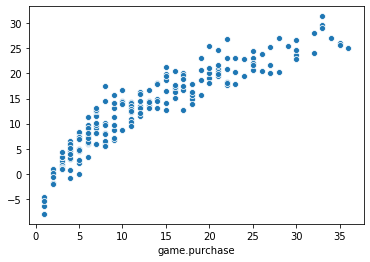

In [36]:
### Improving the model: Making Cross Validated Predictions

sn_y_pred2 = cross_val_predict(sn_model, sn_x, sn_y, cv = 10)
sns.scatterplot(sn_y, sn_y_pred2)

### Since our model is alredy giving us expeted performance, this cross validation is not applicable here.

### Answer to the Question No: 02

*(haberman.csv)*

**2. (10 points) In this exercise, you will have to analyze a dataset (haberman.csv) that contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on patients who had undergone surgery for breast cancer. The task is to determine if the patient survived 5 years or longer (positive) or if the patient died within 5 year (negative).** 

**(More details on the dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names)**

In [37]:
## Reading the given 'haberman.csv' file

column_names  = ['Age', 'Year of operation', 'Number of positive axillary nodes detected', 'Survival status']

df_2 = pd.read_csv('haberman.csv', sep = ',', names = column_names)
df_2.tail(3)

,Age,Year of operation,Number of positive axillary nodes detected,Survival status
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


**• Build a logistic regression classification model using all the three predictor variables (Age, Year of operation, Number of positive axillary nodes detected). Divide the data set into training (70 %) and test set (30 %),  use random state = 0, and follow the process of building a classification model as discussed in the course.**

In [38]:
### Understanding the data, Data Prepearation and EDA

## Following we can have a look from multi dimentional agnle to the dataset, 
# such as- numbers of data entries, null values (if any), datatypes.

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Age                                         306 non-null    int64
 1   Year of operation                           306 non-null    int64
 2   Number of positive axillary nodes detected  306 non-null    int64
 3   Survival status                             306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [39]:
## Converting year format in the 'Year of operation column' from 'YY' to 'YYYY'

df_2['Year of operation'] = df_2['Year of operation'] + 1900
df_2.tail(3)

,Age,Year of operation,Number of positive axillary nodes detected,Survival status
303,77,1965,3,1
304,78,1965,1,2
305,83,1958,2,2


In [40]:
## Removing duplicate rows (if any) from the dataset

hm_df = df_2.drop_duplicates(keep = 'first')
hm_df.shape

(289, 4)

In [41]:
## Some descriptive statistics

hm_df.describe() 

,Age,Year of operation,Number of positive axillary nodes detected,Survival status
count,289.000000,289.000000,289.000000,289.000000
mean,52.422145,1962.906574,4.221453,1.273356
std,10.876915,3.275794,7.325239,0.446455
min,30.000000,1958.000000,0.000000,1.000000
25%,44.000000,1960.000000,0.000000,1.000000
50%,52.000000,1963.000000,1.000000,1.000000
75%,60.000000,1966.000000,5.000000,2.000000
max,83.000000,1969.000000,52.000000,2.000000


In [42]:
hm_df.nunique()  ## Checking unique values

Age                                           49
Year of operation                             12
Number of positive axillary nodes detected    31
Survival status                                2
dtype: int64

In [43]:
### Counting each type of 'Survival status' in the dataset

hm_df['Survival status'].value_counts()

## We can see that in the 'Survival status' column, '1' represents patients survived 5 or more years after operation, whilst
# '2' represents patients died within 05 years of operation, 210 and 79 respectively (as collected info. form the given link).

1    210
2     79
Name: Survival status, dtype: int64

In [44]:
### Replacing with Binary number-

## We replace all the "2" by "0", since we need only 0 and 1 (binary format) as dependent variables, 
# otherwise we'll get an error message with 'statsmodels' library.

hm_df['Survival status'] = hm_df['Survival status'].replace(2, 0)

## Therefore now, '0' denotes patients died within 05 years of operation (total 79), and
# '1' denotes patients survived 5 or more years after operation (total 210)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
### Logistic regression modeling

## Separate predictors and target variable 

hm_x = hm_df[['Age', 'Year of operation', 'Number of positive axillary nodes detected']]
hm_y = hm_df['Survival status']

## Data Split: Deviding the data into asked proportion: training (70 %) and test set (30 %) using 'random_state = 0' method

hm_x_train, hm_x_test, hm_y_train, hm_y_test = train_test_split(hm_x, hm_y, test_size = 0.3, random_state = 0)

In [46]:
## Checking the shape of splitted items

print(hm_x.shape, hm_y.shape)
print(hm_x_train.shape, hm_x_test.shape)
print(hm_y_train.shape, hm_y_test.shape)

(289, 3) (289,)
(202, 3) (87, 3)
(202,) (87,)


In [47]:
### Building the Logistic Model-

## Defining the Logistic Model

hm_model = LogisticRegression(solver = 'lbfgs')

In [48]:
## Now we will train the model usig 'fit' method on the training set 

hm_model.fit(hm_x_train, hm_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
### Applying the model (Prediction)

## Once we trained our model, now we can make predictions for test set

hm_y_pred = hm_model.predict(hm_x_test)
hm_y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [50]:
### Now we will see what the result looks like compared to the original

print(hm_y_test[:5])
                       ## Here,'hm_y_test' is the actual value and 'hm_y_pred' is the perdicted value.
    
print(pd.Series(hm_y_pred[:5]).astype('int'))   ## To get the values in integar format, as by defalut it is an np array.

58     1
191    0
97     0
220    1
278    1
Name: Survival status, dtype: int64
0    1
1    1
2    1
3    1
4    1
dtype: int32


In [51]:
## Probability testing in our Logistic Regression model 

print(hm_model.predict_proba(hm_x_test)[:5])
         ## This shows one calss vs other class: Probability of Surviving vs Probability of Not Surviving in this case.

[[0.22050916 0.77949084]
 [0.26057178 0.73942822]
 [0.18263433 0.81736567]
 [0.22563816 0.77436184]
 [0.25813635 0.74186365]]


In [52]:
### Alternatively, we can also use statsmodels library to build the same model (it helps get the results of statistical tests)


hm_logit_model = sm.Logit(hm_y_train, hm_x_train)   ## Defining the model with the outcome and predicor variables

hm_est_fit = hm_logit_model.fit()    ## Fitting the model on the training set
           
hm_st_pred = hm_est_fit.predict(hm_x_test)  ## Performing predictions on the test set

hm_st_pred_list = list(map(round, hm_st_pred))  
                       ## This helps get the result in round format, which we also might need in accuracy or other examination

print(hm_st_pred_list)  ## Printing the result 

print(hm_est_fit.summary())  ## Printing the summary

Optimization terminated successfully.
         Current function value: 0.545651
         Iterations 5
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
                           Logit Regression Results                           
Dep. Variable:        Survival status   No. Observations:                  202
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                            2
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:                 0.06016
Time:                        23:49:43   Log-Likelihood:                -110.22
converged:                       True   LL-Null:                       -117.28
Covariance Type:            nonrobust   LLR p-value:                 0.0008623
    

In [53]:
###### For your Eyes, sir! 

### I found the following method of printing gave me completely different prediction-

# print(pd.Series(hm_st_pred[:5]).astype('int'))  
                                                ####### Is this a shortcoming of binary formatting and/or rounding ?

# hm_st_pred[:5]

#### • Create the confusion matrix, calculate classification performance measures, and check the accuracy for the test set.

In [54]:
### Model evaluation: Creating the Confusion Matrix

## To assess the qulity of the model, we can analyze the following confusion matrix-

hm_matrix = confusion_matrix(hm_y_test, hm_y_pred)
hm_mat1 = pd.DataFrame(np.array(hm_matrix))   ## Converting array into DF

print(hm_matrix, '\n')  ## Printint the matrix

print('Patients died within 05 years of operation AND Correctly classified:', hm_mat1.iloc[0, 0])
print('Patients died within 05 years of operation BUT Wrongly classified:', hm_mat1.iloc[0, 1], '\n')
print('Patients survived 5 or more years after operation BUT Wrongly classified:', hm_mat1.iloc[1, 0])
print('Patients survived 5 or more years after operation AND Correctly classified:', hm_mat1.iloc[1, 1])

[[ 6 19]
 [ 3 59]] 

Patients died within 05 years of operation AND Correctly classified: 6
Patients died within 05 years of operation BUT Wrongly classified: 19 

Patients survived 5 or more years after operation BUT Wrongly classified: 3
Patients survived 5 or more years after operation AND Correctly classified: 59


In [55]:
## We can check the accuracy rate of the prediction

print('accuracy:','%.2f'% ((6 + 59) / (6 + 19 + 3 + 59)))   ## ('Total Correctly Classified / Total Classified')

accuracy: 0.75


In [56]:
### We can aslo verify this use the following useful function (This also helps calculate differet measures)-

hm_report = classification_report(hm_y_test, hm_y_pred)

print(hm_report)   ## Here, we use print option to have a better view of the output

              precision    recall  f1-score   support

           0       0.67      0.24      0.35        25
           1       0.76      0.95      0.84        62

    accuracy                           0.75        87
   macro avg       0.71      0.60      0.60        87
weighted avg       0.73      0.75      0.70        87



In [57]:
### Additional Evaluation of the model

### Scores with Cross validation

hm_scores = cross_val_score(hm_model, hm_x, hm_y, cv = 10, scoring = 'accuracy')

hm_scores.mean()    ## Our model performance should be as close as to this Cross Validated Score Mean.

0.7369458128078817

In [58]:
## Results for the Training and Test sets 

print('Training set:', hm_model.score(hm_x_train, hm_y_train))
print('Test set:', hm_model.score(hm_x_test, hm_y_test))

Training set: 0.7376237623762376
Test set: 0.7471264367816092


In [59]:
## The intercept and slope

print('Intercept:', hm_model.intercept_)
print('Slope or Coef:', hm_model.coef_)

Intercept: [-2.75663309e-06]
Slope or Coef: [[-0.022341    0.001299   -0.08657624]]


In [60]:
## The mean square error

print('mse:', mean_squared_error(hm_y_test, hm_y_pred))   
                                            
## And the coefficient of determination (We know that '1' is perfect prediction)

print('coef of determination:', r2_score(hm_y_test, hm_y_pred))

mse: 0.25287356321839083
coef of determination: -0.23483870967742004


**• Perform the previous steps but now using only the two variables Age, and Number of positive axillary nodes detected. How did the accuracy of the model on the test set change? Based on this, do you think Year is an important predictor variable?**

In [61]:
###  Performing the previous steps using only two variables- 'Age' and 'Number of positive axillary nodes detected'
### Logistic regression modeling

## Separate predictors and target variable 

hm_x_2 = hm_df[['Age', 'Number of positive axillary nodes detected']]
hm_y_2 = hm_df['Survival status']

## Data Split: Deviding the data into asked proportion: training (70 %) and test set (30 %) using 'random_state = 0' method

hm_x_train_2, hm_x_test_2, hm_y_train_2, hm_y_test_2 = train_test_split(hm_x_2, hm_y_2, test_size = 0.3, random_state = 0)

In [62]:
## Checking the shape of splitted items

print(hm_x_2.shape, hm_y_2.shape)
print(hm_x_train_2.shape, hm_x_test_2.shape)
print(hm_y_train_2.shape, hm_y_test_2.shape)

(289, 2) (289,)
(202, 2) (87, 2)
(202,) (87,)


In [63]:
### Building the Logistic Model-

## Defining the Logistic Model

hm_model_2 = LogisticRegression(solver = 'lbfgs')

In [64]:
## Now we will train the model usig 'fit' method on the training set 

hm_model_2.fit(hm_x_train_2, hm_y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
### Applying the model (Prediction)

## Once we trained our model, now we can make predictions for test set

hm_y_pred_2 = hm_model_2.predict(hm_x_test_2)

In [66]:
### Now we will see what the result looks like compared to the original

print(hm_y_test_2[:5])
                       ## Here,'hm_y_test_2' is the actual value and 'hm_y_pred_2' is the perdicted value.
    
print(pd.Series(hm_y_pred_2[:5]).astype('int'))   ## To get the values in integar format, as by defalut it is an np array.

58     1
191    0
97     0
220    1
278    1
Name: Survival status, dtype: int64
0    1
1    1
2    1
3    1
4    1
dtype: int32


In [67]:
### Model evaluation: Creating the Confusion Matrix

## To assess the qulity of the model, we can analyze the following confusion matrix-

hm_matrix_2 = confusion_matrix(hm_y_test_2, hm_y_pred_2)
hm_matrix_2

array([[ 6, 19],
       [ 3, 59]], dtype=int64)

In [68]:
## We can check the accuracy rate of the prediction

print('accuracy:','%.2f'% ((6 + 59) / (6 + 19 + 3 + 59)))   ## ('Total Correctly Classified / Total Classified')

accuracy: 0.75


In [69]:
### We can aslo verify this using the following useful function (This also helps calculate differet measures)-

hm_report_2 = classification_report(hm_y_test_2, hm_y_pred_2)

print(hm_report_2)   ## Here, we use print option to have a better view of the output

              precision    recall  f1-score   support

           0       0.67      0.24      0.35        25
           1       0.76      0.95      0.84        62

    accuracy                           0.75        87
   macro avg       0.71      0.60      0.60        87
weighted avg       0.73      0.75      0.70        87



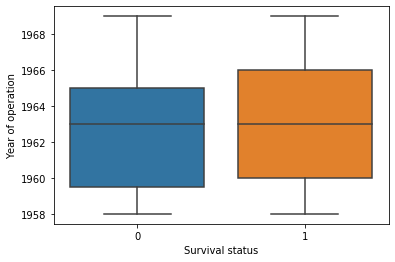

In [70]:
### Visualization with the main data info.

## We can also have a look with the main data information how 'Year of operation' is related to the 'Survival status'

sns.boxplot(x = 'Survival status', y = 'Year of operation', data = hm_df)

**Comments:-** Comparing the models (with and without the variable- 'Year of operation') 

           We observed that, both times we got the same result. That means, the variable 'Year of operation' does not affect
           our Logistic Regression model. Therefore, it is not an important variable in this case.

### Answer to the Question No: 03

*(recommendation.csv)*


**3. (15 points) In this exercise, you have to work with a data of customers, who bought one of two possible
products. Your task is to consider this as a classification problem and build a model that will predict
which one of the two products a customer would buy using the available data (i.e. which product should
the company recommend to a new customer).**

In [71]:
## Reading the given 'recommendation.csv' file

df_3 = pd.read_csv('recommendation.csv', sep = ',', header = 0)
df_3.tail(3)

,gender,age,edu,salary,previous.orders,previous.purchase,favourite.genre,recommendation
487,Female,47,University,4187,34,1700.16,Comic,1
488,Male,38,University,3645,30,935.48,Drama,2
489,Male,53,High School,3525,9,386.40,Drama,2


In [72]:
### Understanding the data, Data Prepearation and EDA

## Following we can have a look from multi dimentional agnle to the dataset, 
# such as- numbers of data entries, null values (if any), datatypes.

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             490 non-null    object 
 1   age                490 non-null    int64  
 2   edu                490 non-null    object 
 3   salary             490 non-null    int64  
 4   previous.orders    490 non-null    int64  
 5   previous.purchase  490 non-null    float64
 6   favourite.genre    490 non-null    object 
 7   recommendation     490 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 30.8+ KB


In [73]:
## Removing duplicate rows (if any) from the dataset

rec_df = df_3.drop_duplicates(keep = 'first')
rec_df.shape

(490, 8)

In [74]:
## Some descriptive statistics

rec_df.describe()

,age,salary,previous.orders,previous.purchase,recommendation
count,490.000000,490.000000,490.000000,490.000000,490.000000
mean,38.969388,3023.759184,22.797959,906.376265,1.808163
std,11.448876,1145.947421,14.142931,626.881628,0.394148
min,20.000000,1013.000000,0.000000,0.000000,1.000000
25%,30.000000,2073.750000,11.250000,407.980000,2.000000
50%,39.000000,2975.000000,21.000000,798.125000,2.000000
75%,49.000000,4009.750000,35.000000,1337.630000,2.000000
max,59.000000,4999.000000,49.000000,3287.190000,2.000000


In [75]:
rec_df.nunique()  ## Checking unique values

gender                 2
age                   40
edu                    3
salary               474
previous.orders       50
previous.purchase    481
favourite.genre        6
recommendation         2
dtype: int64

In [76]:
### Counting each type of 'Survival status' in the dataset

rec_df['recommendation'].value_counts()

## We can see that in the 'recommedation' column, '1' represents 'product 1', whilst '2' represents 'product 2'

2    396
1     94
Name: recommendation, dtype: int64

In [77]:
### Replacing with Binary number-

## We replace all the "2" by "0", since we need only 0 and 1 (binary format) as dependent variables, 
# otherwise we'll get an error message with 'statsmodels' library.

rec_df['recommendation'] = rec_df['recommendation'].replace(2, 0)
rec_df.tail(3)

## Therefore now, '0' denotes 'product 2' (total 396), and '1' denotes 'product 1'(total 94).

,gender,age,edu,salary,previous.orders,previous.purchase,favourite.genre,recommendation
487,Female,47,University,4187,34,1700.16,Comic,1
488,Male,38,University,3645,30,935.48,Drama,0
489,Male,53,High School,3525,9,386.40,Drama,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D5ED2A4C8>,
      dtype=object)

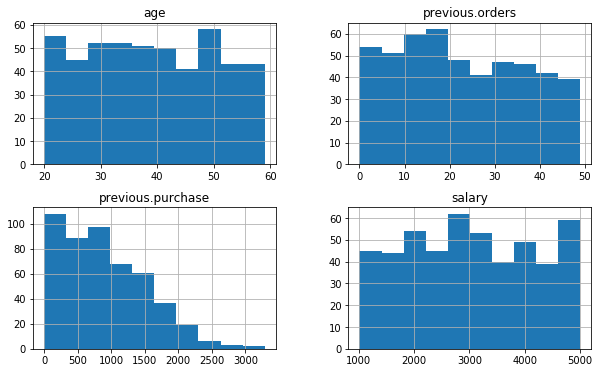

In [78]:
### Now we will see some vizualized form of data analysis

rec_num = rec_df.select_dtypes('number')
rec_num.drop(['recommendation'], axis = 1).hist(figsize=(10, 6))

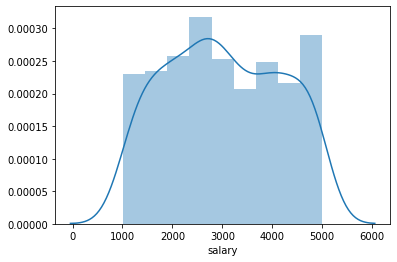

In [79]:
sns.distplot(rec_df['salary'])

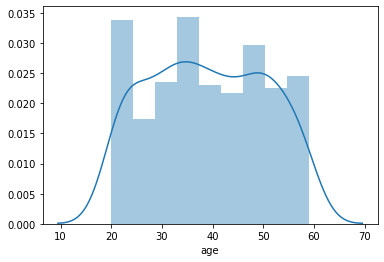

In [80]:
sns.distplot(rec_df['age'])

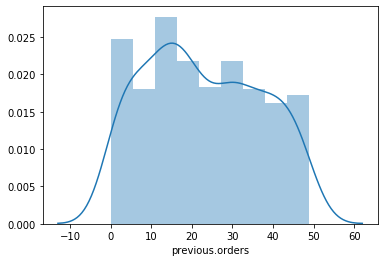

In [81]:
sns.distplot(rec_df['previous.orders'])

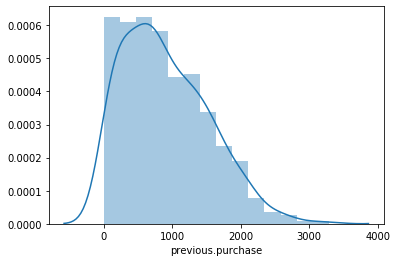

In [82]:
sns.distplot(rec_df['previous.purchase'])

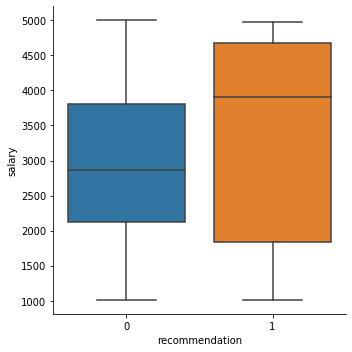

In [83]:
### Relationship analysis.

## Plotting relationship of 'recommendation' column with the other variables in the dataset

sns.catplot(x = 'recommendation', y = 'salary', data = rec_df, kind = 'box')

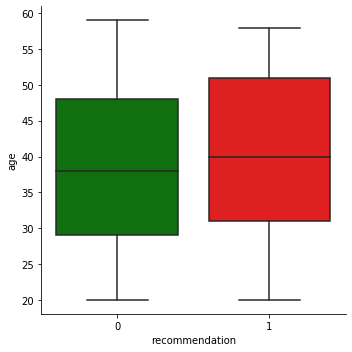

In [84]:
sns.catplot(x = 'recommendation', y = 'age', data = rec_df, palette={0: 'g', 1: 'r'}, kind = 'box')

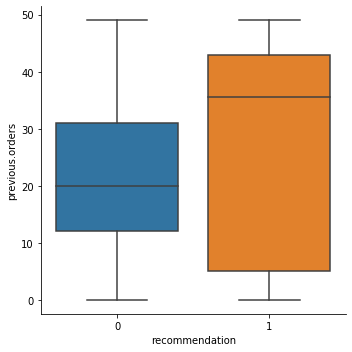

In [85]:
sns.catplot(x = 'recommendation', y = 'previous.orders', data = rec_df, kind = 'box')

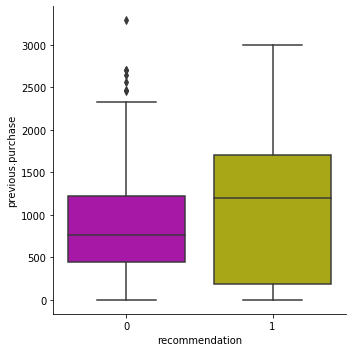

In [86]:
sns.catplot(x = 'recommendation', y = 'previous.purchase', data = rec_df, palette={0: 'm', 1: 'y'}, kind = 'box')

In [87]:
## Correaltion matrix

rec_corr = rec_df.corr()
rec_corr

,age,salary,previous.orders,previous.purchase,recommendation
age,1.000000,0.012507,-0.018515,-0.045542,0.064296
salary,0.012507,1.000000,0.000321,0.003057,0.123099
previous.orders,-0.018515,0.000321,1.000000,0.893941,0.146005
previous.purchase,-0.045542,0.003057,0.893941,1.000000,0.109564
recommendation,0.064296,0.123099,0.146005,0.109564,1.000000


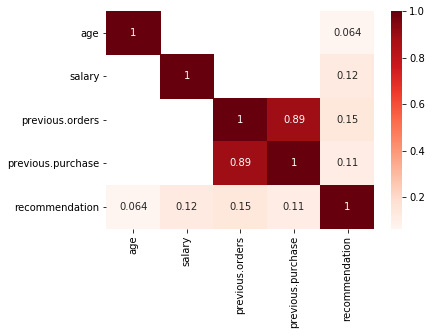

In [88]:
### Plotting correlation: As our target varaible is 'recommendation', we will consider its correlation with other variables.

sns.heatmap(rec_corr[(rec_corr <= -0.05) | (rec_corr >= 0.05)], annot = True, cmap = 'Reds')

## We assume that, Correlation Coefficient values greater than (- 0.05) or less than (+ 0.05) are not that significant.

## In this heatmap filtering we can see that, the correlations visible for all the variables in relation to our target variable.
## Therefore, we will consider all the variables for our Logistic Regression model

**Build a logistic regression model to predict the product that is more likely to be purchased by the customer.
Regarding the categorical columns, create dummy variables (one-hot encoding) for gender, edu, and
favourite.genre to be used in the model.**

**First, create a training set and test set, with test size = 0.20
(set random state to be 0), and after building a model, evaluate predictions for both the test and training
sets. In particular check the difference of accuracy for the training and test; do you see a result that you
would expect there?**

**Second, perform cross-validation with cv = 5 and scoring = 'accuracy'. What is the
minimum and maximum score you observe after building the models?**

In [89]:
## Creating dummy variables for 'Gender', 'Student', 'Married' and 'Ethnicity' columns including one-hot encoding-

rec_catCol = ['gender', 'edu', 'favourite.genre']

rec_dum = pd.get_dummies(rec_df, columns = rec_catCol, drop_first = True)
rec_dum.sample(3)

,age,salary,previous.orders,previous.purchase,recommendation,gender_Male,edu_High School,edu_University,favourite.genre_Comic,favourite.genre_Crime,favourite.genre_Drama,favourite.genre_Horror,favourite.genre_Romance
65,49,3936,15,648.11,0,0,0,1,0,0,1,0,0
386,33,2179,32,839.90,0,0,0,1,0,0,0,1,0
480,24,2976,29,966.48,0,1,0,1,1,0,0,0,0


In [90]:
### Logistic regression modeling

## Separate predictors and target variable 

rec_x = rec_dum.drop(['recommendation'], axis = 1) 
rec_y = rec_dum['recommendation']

## Data Split: Deviding the data into asked proportion: training (80 %) and test set (20 %) using 'random_state = 0' method

rec_x_train, rec_x_test, rec_y_train, rec_y_test = train_test_split(rec_x, rec_y, test_size = 0.20, random_state = 0)

In [91]:
## Checking the shape of splitted items

print(rec_x.shape, rec_y.shape)
print(rec_x_train.shape, rec_x_test.shape)
print(rec_y_train.shape, rec_y_test.shape)

(490, 12) (490,)
(392, 12) (98, 12)
(392,) (98,)


In [92]:
### Building the Logistic Model-

## Defining the Logistic Model

rec_model = LogisticRegression(solver = 'lbfgs')

In [93]:
## Now we will train the model usig 'fit' method on the training set 

rec_model.fit(rec_x_train, rec_y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
### Applying the model (Prediction)

## Once we trained our model, now we can make predictions for test set

rec_y_test_pred = rec_model.predict(rec_x_test)
rec_y_test_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [95]:
## We will now create predictions for training set to compare results

rec_y_train_pred = rec_model.predict(rec_x_train)
rec_y_train_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [96]:
## The intercept and slope

print('Intercept:', rec_model.intercept_)
print('Slope or Coef:', rec_model.coef_)

Intercept: [-1.8681736]
Slope or Coef: [[-1.26562268e-02  3.30398663e-04  2.98562373e-02 -1.15258112e-04
  -3.23229580e-01 -1.29019033e+00 -2.68229815e-01 -4.92364956e-01
  -4.06709045e-01  2.36715332e-01 -3.46660962e-01 -9.41596215e-01]]


In [97]:
### Model Evaluation:-

## Now we will calculated the performance of both the training and test sets

## Results for the Training and Test sets 

print('Training set:', rec_model.score(rec_x_train, rec_y_train))
print('Test set:', rec_model.score(rec_x_test, rec_y_test))

Training set: 0.8545918367346939
Test set: 0.6632653061224489


In [98]:
## We can aslo verify this using the following useful function (This also helps calculate differet measures)-

rec_report_train = classification_report(rec_y_train, rec_y_train_pred)   ## Training set report

rec_report_test = classification_report(rec_y_test, rec_y_test_pred)   ## Test set report

print(rec_report_train, '\n')
print(rec_report_test)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       332
           1       1.00      0.05      0.10        60

    accuracy                           0.85       392
   macro avg       0.93      0.53      0.51       392
weighted avg       0.88      0.85      0.79       392
 

              precision    recall  f1-score   support

           0       0.66      1.00      0.80        64
           1       1.00      0.03      0.06        34

    accuracy                           0.66        98
   macro avg       0.83      0.51      0.43        98
weighted avg       0.78      0.66      0.54        98



**Comments:-** Comparing the accuracy for Training and Test sets.

We observed that, model performance in the Training set is 0.85 % whilst it is less in the Test set (0.66 %). However, it is    not any surprise as the Training set got class difference of more than 5.53 times (between 0 and 1) whilst the Test set got class difference of around 1.88 times only.

In [99]:
### Performing Cross-validation with cv = 5 and scoring = 'accuracy'

rec_scores = cross_val_score(rec_model, rec_x_train, rec_y_train, cv = 5, scoring = 'accuracy') ## using Training sets

print(rec_scores, '\n')

print('The minimum score is:', rec_scores.min())

print('and the maximum score is:', rec_scores.max(), '\n')

print('While the average is:', rec_scores.mean())                                  

[0.84810127 0.86075949 0.84615385 0.84615385 0.84615385] 

The minimum score is: 0.8461538461538461
and the maximum score is: 0.8607594936708861 

While the average is: 0.8494644595910419


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

**Comments:**
I have done the cross validation in the following way too, as I was not sure which way it would be right! however, to me, using the whole dataset makes more sense.

In [100]:
rec_scores_2 = cross_val_score(rec_model, rec_x, rec_y, cv = 5, scoring = 'accuracy') ## using whole data

print(rec_scores_2, '\n')

print('The minimum score is:', rec_scores_2.min())

print('And the maximum score is:', rec_scores_2.max(), '\n')

print('While the average is:', rec_scores_2.mean())   

[0.82653061 0.80612245 0.80612245 0.79591837 0.81632653] 

The minimum score is: 0.7959183673469388
And the maximum score is: 0.826530612244898 

While the average is: 0.810204081632653


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

### Answer to the Question No: 04

*(ItalianWineSamples.csv)*


**4. (10 points) In this exercise you have to work with the data in the file ’ItalianWineSamples.csv’, that
contains 13 chemical measurements on 178 Italian wine samples. More information about the data can
be found here: https://archive.ics.uci.edu/ml/datasets/wine Your task is to perform K-Means
clustering to the dataset; in the model building process, do not use the column ’Type’. After scaling the
variables, determine the optimal number of clusters using the elbow-method introduced in the course, and
then perform the K-Means analysis using the optimal cluster number you determined (set random state
= 0).**

In [101]:
## Reading the given 'ItalianWineSamples.csv' file

## Loading the data using first column as our index-
# This method will help us in later stage, for example, we won't use 'Type' in our model building process.

df_4 = pd.read_csv('ItalianWineSamples.csv', sep = ',', index_col = 0) 
df_4.tail(3)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,,,,,,,,,,,,,
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [102]:
### Understanding the data, Data Prepearation and EDA

## Following we can have a look from multi dimentional agnle to the dataset, 
# such as- numbers of data entries, null values (if any), datatypes.

df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 3
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 19.5 KB


In [103]:
## Removing duplicate rows (if any) from the dataset

wine_df = df_4.drop_duplicates(keep = 'first')
wine_df.shape

(178, 13)

In [104]:
## Checking the wine types and what number of wine samples belong to which type of wine 

wine_df.index.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [105]:
## Some descriptive statistics

wine_df.describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [106]:
wine_df.nunique()  ## Checking unique values

Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D6042ED88>,
      dtype=object)

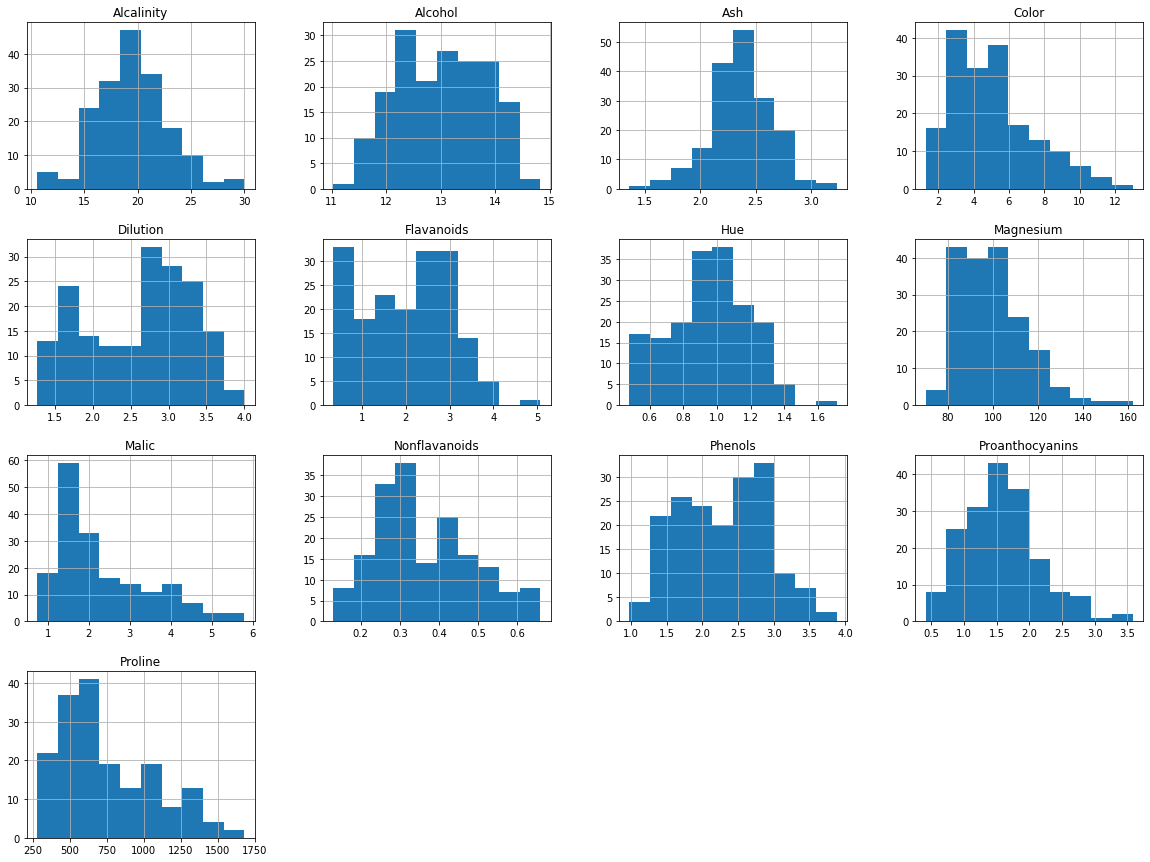

In [107]:
### Now we will see some vizualized form of data analysis

wine_df.hist(figsize=(20, 15))

## We can see the values of our variables in x axis are in different scale.  

In [108]:
### Preprocessing: We will perform now preprocessing in order to get all our variables to be on the same scale
## This standardization will allow all variables to be considered by the Clustering algorithm with equal importance.

df_scaled = wine_df.apply(lambda x: preprocessing.scale(x))
df_scaled.head(5)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,,,,,,,,,,,,,
1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


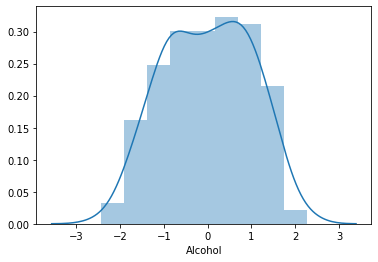

In [109]:
## We will visualize some random examples how they look like after the preprocessing

sns.distplot(df_scaled['Alcohol'])

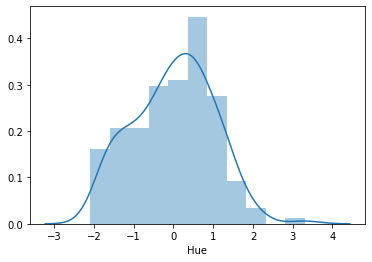

In [110]:
sns.distplot(df_scaled['Hue'])

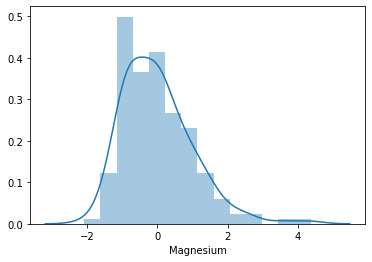

In [111]:
sns.distplot(df_scaled['Magnesium'])

In [112]:
### Clustering: Now we will perform clustering

wine_k_range = range(1, 10)   ## Defining the k-range from 1 to 9.

wine_sse_clust = []  ## To store the Sum of Squared Error (SSE)

for i in wine_k_range:
    
    wine_km = KMeans(n_clusters = i, init = 'k-means++',   ## Defining the KMeans clustering model
                         n_init = 10, random_state = 0)
    
    wine_km.fit(df_scaled)    ## Fitting the defined model to our scaled dataset
    
    wine_sse_clust.append(wine_km.inertia_)  ## To append the actual error measure in our created empty list
                                            ## 'Inertia' is a parameter on our k-means that gives the SSE for each k. 

## We have set our paremeters as to: 'number of clusters' = i, an advanced 'cluster initialization technique' = 'k-means++' 
# which is also by default, 'number of initializations to perform' = 10 (also by default), and 'random_state' = 0. 

## Here,'k-means++' techique will ensure a smarter initialization of the centroids and improve the quality of the clustering,
# whilst 'n_init' will perform the defined number of runs to converge on different cluster assignments.

wine_sse_clust   ## Checking the SSE

[2314.0,
 1658.7588524290954,
 1277.9284888446423,
 1181.8016436661605,
 1111.0533824641802,
 1052.6008735015037,
 995.3626024060992,
 930.4659519639059,
 893.112026580203]

In [113]:
print('Required iterations to coverge:', wine_km.n_iter_ , '\n') ## The number of iterations requried to converge

print(wine_km.cluster_centers_)  ## Checking the final locations of the centroids of each cluster. 

## Optional: Even though it does not say that much but still we can see that  for example, for the 1st column ('Alcohol'), 
# 9th cluster has the highest value which indicates that, in that corresponding Type of wine Alcohol is higher 

Required iterations to coverge: 5 

[[-1.02356276 -0.4082108   0.13701368  0.71739772 -0.60534944 -0.57477613
  -0.29242505  0.85852755 -0.39474259 -0.99045111  0.5492534  -0.0424939
  -0.75081847]
 [ 0.65012625 -0.18108822  0.20534043 -0.75150407  0.12346503  0.45710074
   0.65678687 -0.65026565  0.08670318 -0.16421583  0.39086372  0.84562841
   0.99524925]
 [ 0.31755491  0.58744954  0.30937706  0.64828597  0.27739428 -0.95603243
  -1.08355083  0.2236964  -0.46789884  1.60349803 -1.39782052 -1.44850467
  -0.37653267]
 [ 0.57466423 -0.45153801  1.55711362  0.78225927  1.11815402  1.04400602
   1.09171041 -0.00822379  0.38972388  0.06967698  0.94349966  0.62144839
   0.79407498]
 [-0.76003956 -0.84770668 -1.67116163 -0.53298899 -0.75420173 -0.37138685
  -0.24423465 -0.34799461 -0.58093073 -0.78356731  0.73656351  0.19347822
  -0.79684501]
 [ 0.02497132  1.25215183  0.11477702  0.44568985 -0.46164614 -1.0270075
  -1.38264925  1.24409357 -1.07910665  0.25117614 -0.96499269 -1.11703331
  -

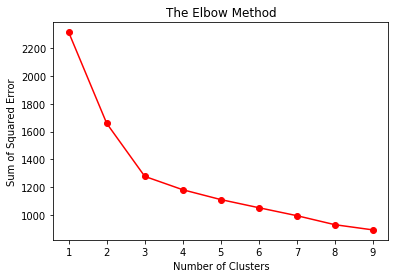

In [114]:
### Determining the optimal number of clusters-

## Plotting the SSE

plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.title('The Elbow Method')
plt.plot(wine_k_range, wine_sse_clust, marker='o', color = 'red')
plt.show()

## Using Elbow method, we can determine that the optimal number of clusters is 3.

In [115]:
###  Performing the K-Means analysis using the determined optimal cluster number 

## As we already have decided on using 3 clusters, now we can create the final model

wine_kmean = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)   ## Defining the Final KMeans clustering model

wine_y_clust = wine_kmean.fit_predict(df_scaled)  ## Fitting and Predicting
wine_y_clust

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

#### • How many observations are there in each cluster?

#### • What is the average of each variable in each cluster (the original, not the scaled variables)?

#### • Can you identify some variables that clearly have different average values for each cluster?

In [116]:
### Interpreting the clusters.

## We can now look at how the attributes vary over clusters

gb = wine_df.groupby(wine_y_clust)   ## Grouping by the Clusters
gb.first()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450


In [117]:
### Checking the number of observations in each Cluster

gb.size()

0    62
1    65
2    51
dtype: int64

In [118]:
### Checking the average of all the variables

gb.mean()

## We can see that, more or less, all the variables have different average values for each Cluster

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
2,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


**• Compare your K-Means Clustering solution with the ’Type’ variable, which describes the wine varietal
each wine sample belongs to out of three possible types. If you consider the created clusters, do any
of them correspond to one of the categories in Type (i.e., most of the wines belonging to the cluster
have the same Type), or are the clusters just a mix of all the categories in Type?**

In [119]:
### Comparing K-Means Clustering solution with the ’Type’ variable
## For the ease of our comparison, we will now add the created cluster to our dataframe

wine_df['Cluster'] = wine_y_clust
wine_df.sample(5)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
Type,,,,,,,,,,,,,,
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
2,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415,1
1,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020,0
2,12.29,3.17,2.21,18.0,88,2.85,2.99,0.45,2.81,2.30,1.42,2.83,406,1
1,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035,0


In [120]:
clust_0 = wine_df.loc[wine_df['Cluster'].isin([0])]  ## Separating only Cluster 0
clust_0.index.unique()

Int64Index([1, 2], dtype='int64', name='Type')

In [121]:
clust_0.index   

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2],
           dtype='int64', name='Type')

In [122]:
clust_1 = wine_df.loc[wine_df['Cluster'].isin([1])]  ## Separating only Cluster 1
clust_1.index.unique()

Int64Index([2], dtype='int64', name='Type')

In [123]:
clust_2 = wine_df.loc[wine_df['Cluster'].isin([2])]   ## Separating only Cluster 2
clust_2.index.unique()

Int64Index([2, 3], dtype='int64', name='Type')

In [124]:
clust_2.index

Int64Index([2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Type')

**Comments:-** on Comparing K-Means Clustering solution with the ’Type’ variable-

We can see that **Cluster 1** solely represents **Wine Type 2**, whilst most of the wines belonging to the **Cluster 0 and Cluster 2** represent **Wine Type 1 and 3** respectively. 

Therefore, **Cluster 0 and 2** are slightly mixed.